# A Star Finding Model

## Imports

In [227]:
import random
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
from queue import PriorityQueue

# A Star Model

## Creating the A* Model

In [228]:
class AStarNode:
    # def __init__(self, x, y):
    #     self.x = x
    #     self.y = y
    #     self.prevNode = None
    #     self.gCost = 0
    #     self.hCost = 0
    #     self.fCost = 0
        
    def __init__(self, x, y, prevNode=None):
        self.x = x
        self.y = y
        self.prevNode = prevNode
        self.gCost = 0
        self.hCost = 0
        self.fCost = 0

    def CalculateFCost(self):
        self.fCost = self.gCost + self.hCost

In [229]:
class PathFinder:

    def __init__(self, map, startPoint, endPoint):
            self.map = np.array(map)
            self.startPoint = startPoint
            self.endPoint = endPoint
            self.path = []

    def FindPath(self):
            
            startNode = AStarNode(self.startPoint[0], self.startPoint[1])
            endNode = AStarNode(self.endPoint[0], self.endPoint[1])
            currentNode = None

            width = self.map.shape[0]
            height = self.map.shape[1]
            directions = [[-1, 0], [1, 0], [0, 1], [0, -1]]

            startNode.gCost = 0
            startNode.hCost = self.CalculateDistanceCost(startNode, endNode)
            startNode.CalculateFCost()

            openList = [startNode]
            closedList = []

            while len(openList) > 0:
                currentNode = self.GetLowestCostNode(openList)

                if currentNode.x == endNode.x and currentNode.y == endNode.y:
                    break

                openList.remove(currentNode)
                closedList.append(currentNode)

                for i in range(len(directions)):
                    nextX = currentNode.x + directions[i][0]
                    nextY = currentNode.y + directions[i][1]
                    nextNode = AStarNode(nextX, nextY, currentNode)

                    alreadyVisited = any(node.x == nextNode.x and node.y == nextNode.y for node in closedList)
                    sameCoorIndex = next((i for i, node in enumerate(openList) if node.x == nextNode.x and node.y == nextNode.y), -1)

                    if 0 <= nextX < width and 0 <= nextY < height and not alreadyVisited and self.map[nextX][nextY] != 1:
                        gCost = currentNode.gCost + self.CalculateDistanceCost(currentNode, nextNode)
                        nextNode.gCost = gCost

                        hCost = self.CalculateDistanceCost(nextNode, endNode)
                        nextNode.hCost = hCost

                        nextNode.CalculateFCost()

                        if sameCoorIndex == -1 or (nextNode.fCost < openList[sameCoorIndex].fCost):
                            openList.append(nextNode)

            print("Current Position: ")
            print(currentNode.x, currentNode.y)

            traverseNode = currentNode.prevNode
            pathDistance = 0

            if traverseNode is not None:
                while traverseNode.prevNode is not None:
                    pathDistance += 1
                    self.map[traverseNode.x][traverseNode.y] = 2
                    traverseNode = traverseNode.prevNode
            else:
                print("traverseNode is None")

            print("Shortest Path Distance: ", pathDistance)
            
            # Append the coordinates of each node to the path list
            while currentNode is not None:
                self.path.append((currentNode.x, currentNode.y))
                currentNode = currentNode.prevNode

            # Reverse the list so that it starts from the start point and ends at the end point
            self.path = self.path[::-1]
            print("Path taken: ")
            print(self.path)

            # Add the path to the plot
            for point in self.path:
                plt.scatter(point[1], point[0], c='g', marker='o')

            return self.path

    # The CalculateDistanceCost method takes two AStarNode objects as input and returns the Manhattan distance between the two nodes.
    def CalculateDistanceCost(self, a, b):
        xDistance = abs(a.x - b.x)
        yDistance = abs(a.y - b.y)

        # Manhattan distance formula
        distance = xDistance + yDistance

        return distance

    # The GetLowestCostNode method takes a list of AStarNode objects and returns the node with the lowest fCost (total cost = gCost + hCost)
    def GetLowestCostNode(self, pathList):
        lowestCostNode = pathList[0]

        for i in range(1, len(pathList)):
            if pathList[i].fCost < lowestCostNode.fCost:
                lowestCostNode = pathList[i]

        return lowestCostNode

## Testing The A* Model

Start Point: 
(1, 4)
End Point: 
(3, 1)
Current Position: 
3 1
Shortest Path Distance:  4
Path taken: 
[(1, 4), (1, 3), (1, 2), (1, 1), (2, 1), (3, 1)]


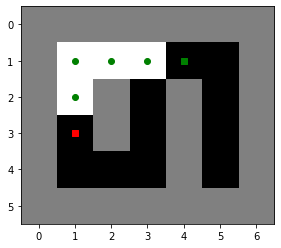

In [278]:
#TESTTING THE A* MODEL

# Define the map as a 2D array
# 1 represents a wall, 0 represents open space, 2 represents the pallet
map = np.array([[1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 1],
                [1, 0, 1, 0, 1, 0, 1],
                [1, 0, 1, 0, 1, 0, 1],
                [1, 0, 0, 0, 1, 0, 1],
                [1, 1, 1, 1, 1, 1, 1]])

# Define the starting position of the AI
# startPoint = (4, 4)
while True:
    startPoint = (random.randint(0, 5), random.randint(0, 5))
    if map[startPoint[0]][startPoint[1]] != 1:
        break

# Define the location of the pallet
# endPoint = (25, 25)
while True:
    endPoint = (random.randint(0, 5), random.randint(0, 5))
    if map[endPoint[0]][endPoint[1]] != 1 and endPoint != startPoint:
        break

print("Start Point: ")
print(startPoint)
print("End Point: ")
print(endPoint)

if map[startPoint[0]][startPoint[1]] != 1 and map[endPoint[0]][endPoint[1]] != 1:

    # Call the A* function to find the path from the start to the end point
    path_finder = PathFinder(map, startPoint, endPoint,)
    # path_finder.FindPath()
    path = path_finder.FindPath()

    # # Plot the map using imshow()
    # cmap = matplotlib.colors.ListedColormap(['blue', 'green'])
    plt.imshow(path_finder.map, cmap='gray')

    # Plot the start and end points
    plt.scatter(startPoint[1], startPoint[0], c='g', marker='s')
    plt.scatter(endPoint[1], endPoint[0], c='r', marker='s')

    # Show the plot
    # plt.show()

else:
    print("Start point or end point is on a wall. Please choose new coordinates.")

# Map Generation (Cellular Automata)

## Map Generation

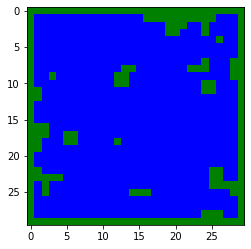

In [231]:
class MapGenerationCA():

    def __init__(self, map):
        self.map = np.array(map)

    def create_mapCA(self):

        width = self.map.shape[0]
        height = self.map.shape[1]

        

        for i in range(width):
            for j in range(height):
                if (i == 0 or i == width-1 or j == 0 or j == height -1):
                    self.map[i][j]=1
                else:
                    if (random.randint(0,100)>70):
                        self.map[i][j]=1
                    else:
                        self.map[i][j]=0

        for i in range(1, width - 1):
            for j in range(1, height - 1):
                neighbors = [self.map[i-1][j], self.map[i+1][j], self.map[i][j-1], self.map[i][j+1]]
                if sum(neighbors) < 2 :
                    self.map[i][j] = 0
                elif sum(neighbors) >3:
                    self.map[i][j]=1


        return self.map


map_generationCA = MapGenerationCA(np.zeros((30, 30)))
CAmap = map_generationCA.create_mapCA()

# # # Plot the map using imshow()
cmap = matplotlib.colors.ListedColormap(['blue', 'green'])
plt.imshow(map_generationCA.map, cmap=cmap)


## Testing C.A Map

Start Point: 
(3, 12)
End Point: 
(13, 2)
Current Position: 
13 2
Shortest Path Distance:  19
Path taken: 
[(3, 12), (4, 12), (5, 12), (6, 12), (7, 12), (8, 12), (9, 12), (10, 12), (11, 12), (11, 11), (11, 10), (11, 9), (12, 9), (13, 9), (13, 8), (13, 7), (13, 6), (13, 5), (13, 4), (13, 3), (13, 2)]


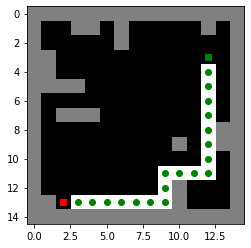

In [283]:
#________________________________________________________________________________________________________________
# Load the Celular Automata Map Generation
#________________________________________________________________________________________________________________

# C.A Map
map_generationCA = MapGenerationCA(np.zeros((15, 15)))
map = map_generationCA.create_mapCA()

#________________________________________________________________________________________________________________
# Test the A Star Path Finding on the Celullar Automata Map Generation.
#________________________________________________________________________________________________________________

# # Define the starting position of the AI
# # startPoint = (4, 4)
# startPoint = (random.randint(0, 29), random.randint(0, 29))

# # Define the location of the pallet
# # endPoint = (25, 25)
# endPoint = (random.randint(0, 29), random.randint(0, 29))

while True:
    startPoint = (random.randint(0, 14), random.randint(0, 14))
    if map[startPoint[0]][startPoint[1]] != 1:
        break

while True:
    endPoint = (random.randint(0, 14), random.randint(0, 14))
    if map[endPoint[0]][endPoint[1]] != 1 and endPoint != startPoint:
        break

print("Start Point: ")
print(startPoint)
print("End Point: ")
print(endPoint)

if map[startPoint[0]][startPoint[1]] != 1 and map[endPoint[0]][endPoint[1]] != 1:
    
    # Call the A* function to find the path from the start to the end point
    path_finder = PathFinder(map, startPoint, endPoint,)
    path = path_finder.FindPath()

    # # Plot the map using imshow()
    cmap = matplotlib.colors.ListedColormap(['blue', 'green'])
    plt.imshow(path_finder.map, cmap='gray')

    # Plot the start and end points
    plt.scatter(startPoint[1], startPoint[0], c='green', marker='s')
    plt.scatter(endPoint[1], endPoint[0], c='red', marker='s')

    # Add the path to the plot
    # for point in path:
    #     plt.scatter(point[0], point[1], c='pink', marker='o')

    # Show the plot
    # plt.show()

else:
    print("Start point or end point is on a wall. Please choose new coordinates.")


# Map Generation (Drunkard Walk)

## Map Generation

⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬜⬜⬛⬛⬛
⬛⬜⬜⬜⬜⬜⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬜⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬜⬛⬛⬛⬛
⬛⬜⬜⬜⬜⬛⬜⬜⬜⬛
⬛⬛⬜⬜⬜⬜⬜⬜⬜⬛
⬛⬛⬛⬜⬜⬜⬜⬜⬜⬛
⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛


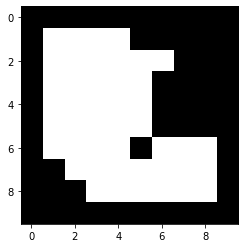

In [233]:
class MapGenerationDW():

    def __init__(self, map):
        self.map = map

    def create_mapDW(self):
        width = self.map.shape[0]
        height = self.map.shape[1]
        map = np.ones((width,height))

        FillPercentage = 70

        counter = 0

        x = random.randint(1,width-2)
        y = random.randint(1,height-2)

        while(counter<((width-2)*(height-2)*FillPercentage/100)):

            move = random.randint(0,3)
            if((x!=0) & (x!=width-1) & (y!=0) & (y!=height-1)):

                #UP
                if(move==0):
                    if((x>0) & (x<width-1) & (y+1>0) & (y+1<height-1)):
                        y=y+1

                #RIGHT
                elif(move==1):
                    if((x+1>0) & (x+1<width-1) & (y>0) & (y<height-1)):
                        x=x+1

                #DOWN
                elif(move==2):
                    if((x>0) & (x<width-1) & (y-1>0) & (y-1<height-1)):
                        y=y-1

                #LEFT
                else:
                    if((x-1>0) & (x-1<width-1) & (y>0) & (y<height-1)):
                        x=x-1

                if(map[x,y] == 1):
                    counter+=1
                map[x,y] = 0

        # Get a list of empty cells
        # empty_cells = [(i, j) for i in range(1, width-1) for j in range(1, height-1) if map[i, j] == 0]
        # print ("Empty cells")
        # print (empty_cells)

        # Select random empty cells as start point and endpoint
        # start_point = random.choice(empty_cells)
        # empty_cells.remove(start_point)
        # end_point = random.choice(empty_cells)

        # start_point = (3,2)
        # end_point = (5,5)

        # Mark the start point and endpoint in the map
        # map[start_point[0], start_point[1]] = 2
        # map[end_point[0], end_point[1]] = 3
        
        for j in range(height):
            for i in range(width):
                if(map[i,j]==0):
                    print("⬜", end="")
                else:
                    print("⬛", end="")
            print("")

        # elif(map[i,j]==2):
        #             print("\033[1;32;mS", end="")
        # elif(map[i,j]==3):
        #             print("\033[1;31;mE", end="")

        colors = ["white", "black","green","black"]
        cmap = matplotlib.colors.ListedColormap(colors)
        map = np.fliplr(map)
        # map = np.flipud(map)
        map = np.rot90(map, k=1)

        # Plot the map using imshow()
        plt.imshow(map, cmap=cmap)
        plt.show()

        return map

map_generation = MapGenerationDW(np.zeros((10, 10)))
map = map_generation.create_mapDW()
# empty_cells = map_generation.create_mapDW()



## Testing Drunkard Walk

Start Point: 
(4, 4)
End Point: 
(9, 5)
Current Position: 
9 5
Shortest Path Distance:  5
Path taken: 
[(4, 4), (5, 4), (6, 4), (6, 5), (7, 5), (8, 5), (9, 5)]


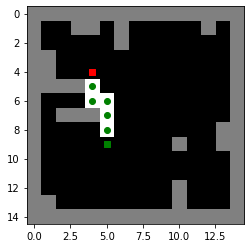

In [284]:
#________________________________________________________________________________________________________________
# Load the Drunkard Walk Map Generation
#________________________________________________________________________________________________________________

# C.A Map
map_generation = MapGenerationDW(np.zeros((10, 10)))
# map = map_generation.create_mapDW()
# empty_cells = map_generation.create_mapDW()

#________________________________________________________________________________________________________________
# Test the A Star Path Finding on the Drunkard Walk Map Generation.
#________________________________________________________________________________________________________________

while True:
    startPoint = (random.randint(0, 9), random.randint(0, 9))
    if map[startPoint[0]][startPoint[1]] != 1:
        break

while True:
    endPoint = (random.randint(0, 9), random.randint(0, 9))
    if map[endPoint[0]][endPoint[1]] != 1 and endPoint != startPoint:
        break

print("Start Point: ")
print(startPoint)
print("End Point: ")
print(endPoint)


# # Define the starting position of the AI
# startPoint = (1, 1)

# # Define the location of the pallet
# endPoint = (3, 3)

if map[startPoint[0]][startPoint[1]] != 1 and map[endPoint[0]][endPoint[1]] != 1:
    
    # Call the A* function to find the path from the start to the end point
    path_finder = PathFinder(map, startPoint, endPoint,)
    path = path_finder.FindPath()

    # # # Plot the map using imshow()
    # cmap = matplotlib.colors.ListedColormap(['blue', 'green'])
    # plt.figure(figsize=(5, 5))
    plt.imshow(path_finder.map, cmap='gray')

    # # Plot the start and end points
    plt.scatter(startPoint[1], startPoint[0], c='r', marker='s')
    plt.scatter(endPoint[1], endPoint[0], c='g', marker='s')

# # Add the path to the plot
# for point in path:
#     plt.scatter(point[0], point[1], c='pink', marker='o')

# # # Show the plot
# plt.show()

else:
    print("Start point or end point is on a wall. Please choose new coordinates.")

# Explanation of the Code

## Path Finder Class

"PathFinder" that uses the A* algorithm to find the shortest path between a start point and an end point on a given map.

The class has 3 instance variables:

- "map": a 2D array representing the map, where 0 represents an empty cell and 1 represents an obstacle
- "startPoint": a tuple containing the x, y coordinates of the starting point on the map
- "endPoint": a tuple containing the x, y coordinates of the ending point on the map
- "path": a list that will store the coordinates of each node in the path from start to end point
- The class has three methods:

- The init method initializes the instance variables when a new object of the class is created.
- The FindPath method is where the A* algorithm is implemented. It uses the Manhattan distance formula to calculate the distance cost between two nodes and uses that cost to determine the best path from the start point to the end point.
- The CalculateDistanceCost method takes two AStarNode objects as input and returns the Manhattan distance between the two nodes.
- The GetLowestCostNode method takes a list of AStarNode objects and returns the node with the lowest fCost (total cost = gCost + hCost)

The A* algorithm works by:

1. Creating a start and end node from the start and end points passed to the class.
2. Initializing the gCost (movement cost from the start node to the current node) and hCost (estimated movement cost from the current node to the end node) of the start node.
3. Creating an open list and a closed list and adding the start node to the open list.
4. While the open list is not empty:
5. Getting the node with the lowest fCost (total cost) from the open list, this node will be the current node.
6. If the current node is the end node, the algorithm has found the shortest path and the method returns the path.
7. Removing the current node from the open list and adding it to the closed list.
8. For each possible direction from the current node, checking if the next node is within the boundaries of the map, has not been visited before and is not an obstacle.
9. If the next node is a valid node, calculating its gCost and hCost and adding it to the open list.
10. If the next node is already in the open list and has a lower fCost than the current one, update the fCost and the parent of the node.
11. When the open list is empty, the algorithm has not found a path.
12. The path variable is filled with the nodes traversed in reverse order and returned.
13. The path is plotted on the map using matplotlib.